In [6]:
import os
import json

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [7]:
records = []
for p in os.listdir("../log/nn-mf-alpha/"):
    with open(f"../log/nn-mf-alpha/{p}", "r") as f:
        d = json.load(f)
        records.append(pd.json_normalize(d))

df = pd.concat(records).sort_values("args.alpha")

FileNotFoundError: [Errno 2] No such file or directory: './log/nn-mf-alpha/'

In [ ]:
df.groupby("args.model").max("evaluations.Uplift@30")

,args.alpha,args.batch_size,args.d,args.epochs,args.eta,args.eval_step,args.gamma_p,args.gamma_r,args.lmda,args.seed,evaluations.Accuracy@10,evaluations.Accuracy@100,evaluations.Accuracy@30,evaluations.Uplift@10,evaluations.Uplift@100,evaluations.Uplift@30
args.model,,,,,,,,,,,,,,,,
mf,1.0,1000,100,5000,0.01,1000,0.2,0.5,0.0001,0,0.180258,0.040152,0.090253,0.134682,0.029853,0.077609
nn,1.0,1000,100,5000,0.01,1000,0.2,0.5,0.0001,0,0.178710,0.043233,0.091394,0.136026,0.031904,0.072503


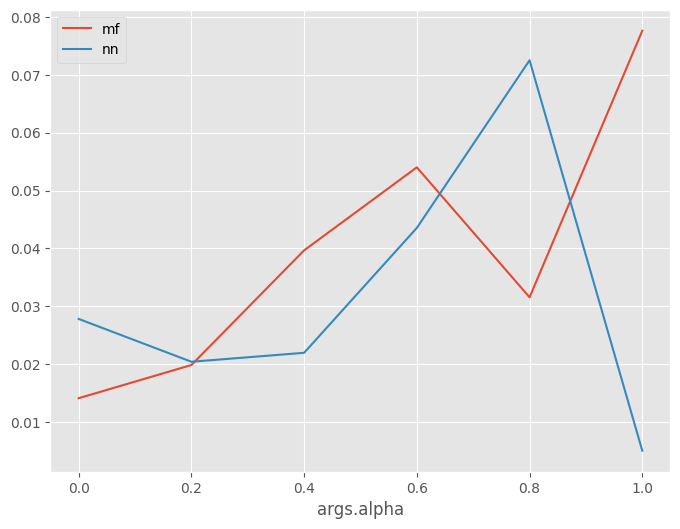

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

for label, model_df in df.groupby("args.model"):
    model_df.plot("args.alpha", "evaluations.Uplift@30", ax=ax, label=label)

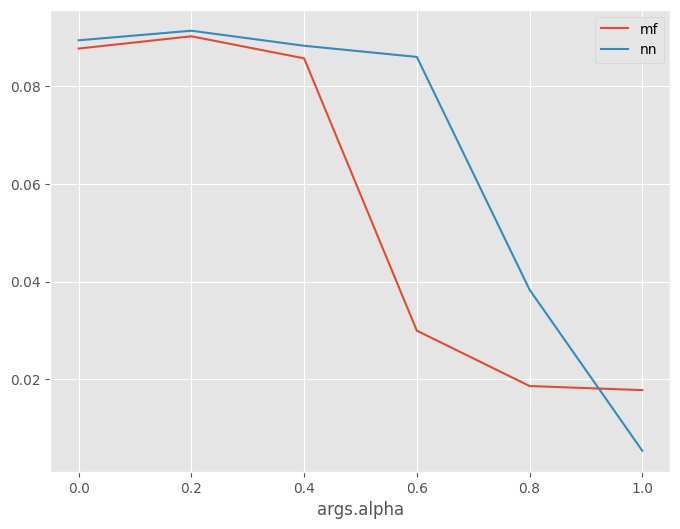

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

for label, model_df in df.groupby("args.model"):
    model_df.plot("args.alpha", "evaluations.Accuracy@30", ax=ax, label=label)